In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns




In [61]:
df=pd.read_csv(r"D:\data\sample sales data\sales_data_sample.csv",encoding= 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Cleaning Data 
1.see nan values (missing values)
2.drop columns we don't need
3.remove duplicates
4.remove outliers if we found


In [63]:
#drop columns we don't need to use 
df.drop(columns=["ADDRESSLINE1","ADDRESSLINE2","STATE","TERRITORY","CONTACTLASTNAME","CONTACTFIRSTNAME","POSTALCODE"],axis=1,inplace=True)

In [66]:
pd.set_option('display.max_columns',None)

In [68]:
df.drop(columns=["ORDERDATE","PRODUCTCODE","CUSTOMERNAME","PHONE"],axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  CITY             2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(7), object(5)
memory usage: 308.9+ KB


EDA


In [70]:
#average of sales in month 
df.groupby(df["MONTH_ID"])["SALES"].mean()

MONTH_ID
1     3431.766114
2     3618.044196
3     3558.968821
4     3760.623371
5     3666.557778
6     3471.425802
7     3651.602624
8     3451.887801
9     3419.440175
10    3536.956530
11    3549.222228
12    3525.995111
Name: SALES, dtype: float64

In [72]:
#average sales in years
df.groupby(df["YEAR_ID"])["SALES"].mean()

YEAR_ID
2003    3516.979540
2004    3512.388550
2005    3747.880146
Name: SALES, dtype: float64

In [73]:
#heighst sales depend on city
df.groupby(df["CITY"])["SALES"].max()

CITY
Aaarhus          7975.44
Allentown        7962.24
Barcelona        6482.85
Bergamo          5279.40
Bergen           8714.70
                  ...   
Toulouse         8331.61
Tsawassen        5795.54
Vancouver        9064.89
Versailles      10172.70
White Plains     7620.50
Name: SALES, Length: 73, dtype: float64

In [74]:
#heighst sales depend on country
df.groupby(df["COUNTRY"])["SALES"].max()

COUNTRY
Australia       9774.03
Austria         9240.00
Belgium         6804.63
Canada          9064.89
Denmark        10468.90
Finland        10606.20
France         11739.70
Germany         8940.96
Ireland         8258.00
Italy           9160.36
Japan          10758.00
Norway          8844.12
Philippines     7483.98
Singapore      10993.50
Spain          12001.00
Sweden          7209.11
Switzerland     6761.60
UK             11886.60
USA            14082.80
Name: SALES, dtype: float64

In [82]:
#average of the quantity depend on process
df.groupby(df["STATUS"])["QUANTITYORDERED"].mean()

STATUS
Cancelled     33.966667
Disputed      42.642857
In Process    36.341463
On Hold       42.704545
Resolved      35.319149
Shipped       34.926634
Name: QUANTITYORDERED, dtype: float64

In [92]:
#the number of size in each part about processing in data
df.groupby(df["STATUS"])["DEALSIZE"].value_counts()


STATUS      DEALSIZE
Cancelled   Medium        33
            Small         27
Disputed    Large          5
            Medium         5
            Small          4
In Process  Small         20
            Medium        18
            Large          3
On Hold     Medium        24
            Small         15
            Large          5
Resolved    Medium        26
            Small         20
            Large          1
Shipped     Medium      1278
            Small       1196
            Large        143
Name: DEALSIZE, dtype: int64

Visualize data

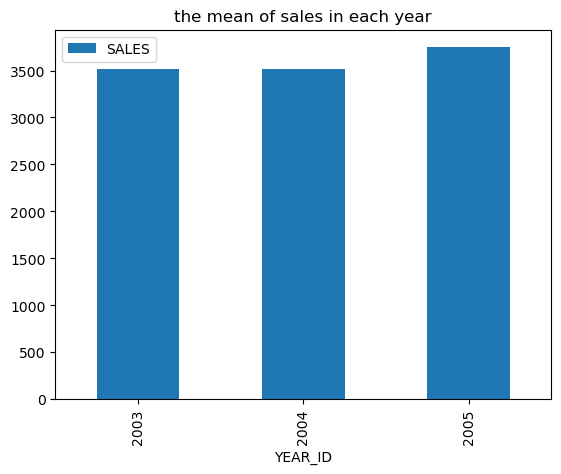

In [65]:
#average of sales in each year
x=df.groupby(df["YEAR_ID"])["SALES"].mean().plot(kind="bar",legend=True)
plt.title("the mean of sales in each year")

plt.show()


<Axes: xlabel='STATUS,DEALSIZE'>

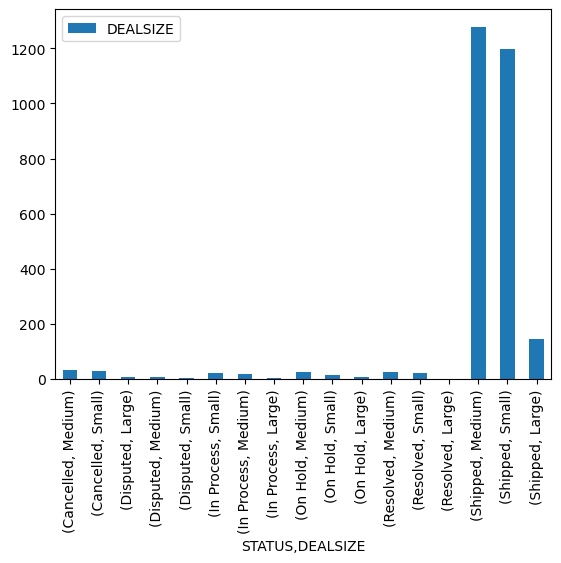

In [93]:
df.groupby(df["STATUS"])["DEALSIZE"].value_counts().plot(kind="bar",legend=True)

<Axes: ylabel='DEALSIZE'>

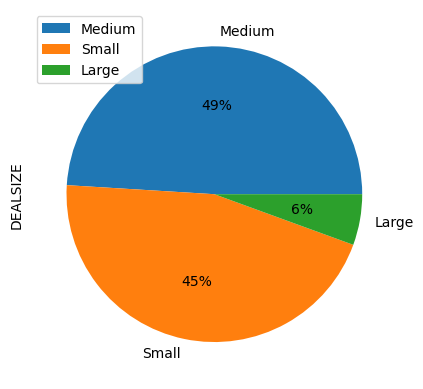

In [107]:
df["DEALSIZE"].value_counts().plot(kind="pie",legend=True,autopct='%.0f%%')

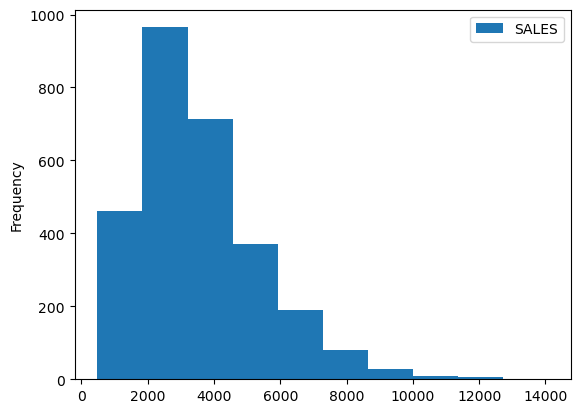

In [105]:
#right skewed histogram
#that meaning data is positive
df["SALES"].plot(kind="hist",legend=True)
plt.show()

C:\Users\Mohamed Assem\AppData\Local\Temp\ipykernel_18576\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

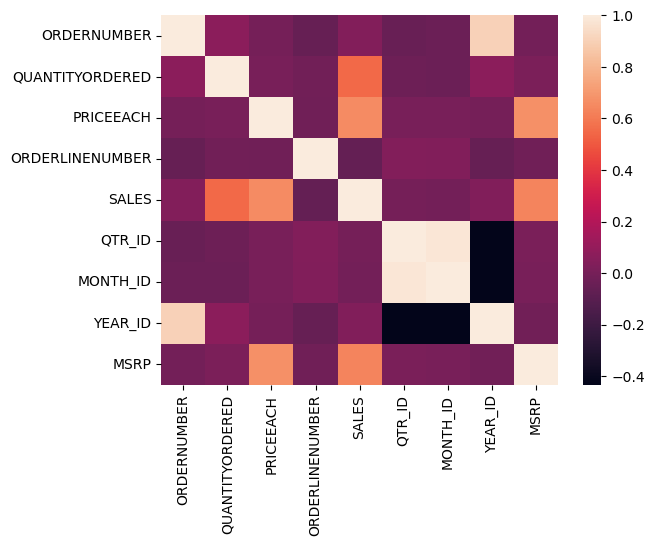

In [106]:
sns.heatmap(df.corr())